In [3]:
import numpy as np

In [4]:
# https://www.reddit.com/r/learnpython/comments/y45ogo/how_can_i_import_code_from_the_parent_directory/

# imports
from pathlib import Path
import sys  

# Get my_package directory path from Notebook
parent_dir = str(Path().resolve().parents[1])

# Add to sys.path
sys.path.insert(0, parent_dir)

In [5]:
# plots imports & setup
import matplotlib.pyplot as plt
import seaborn as sns
from aquarel import load_theme

# setup

theme = load_theme("minimal_light")
theme.apply()
COLORS = ['#004aad', '#2bb4d4', '#2e2e2e', '#5ce1e6']

In [6]:
from scipy.stats import ttest_ind

In [7]:
# custom imports
from mocks.hypothesis_testing.hypothesis_testing_mocks import mock_problems
from artefacts.hypothesis_testing.statistical_tests.t_test import Ttest, TtestInputTestParameters
from artefacts.hypothesis_testing.data.input_parameters import AlternativeStudentHypothesis

## Application

### Données synthétiques

<Figure size 640x480 with 0 Axes>

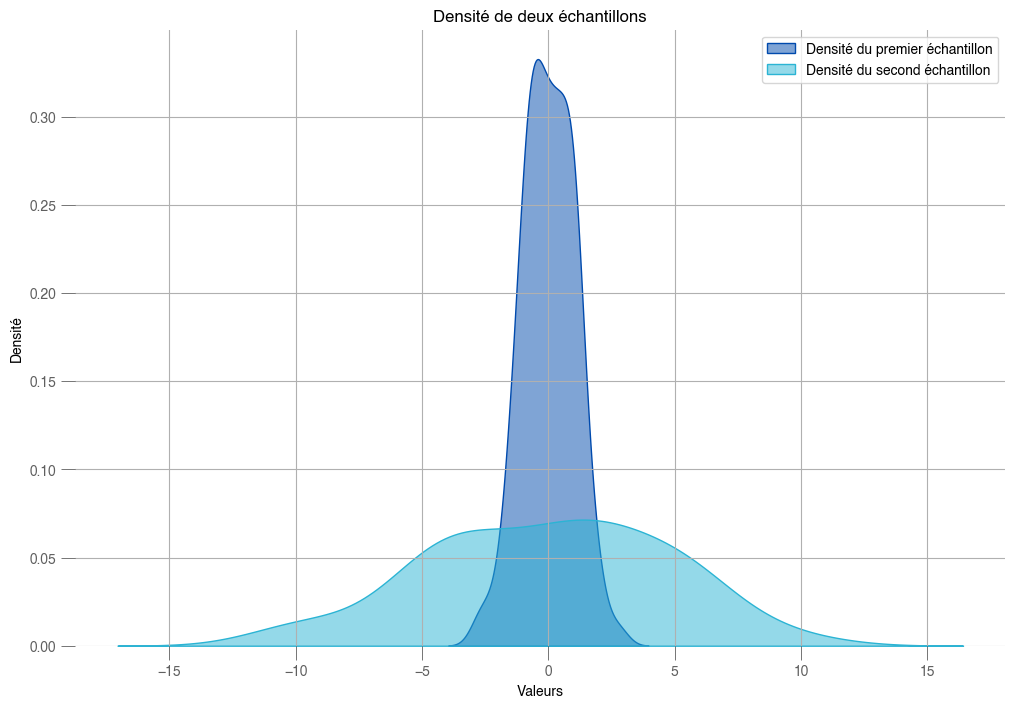

In [8]:
# generation des données
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 5, 100)

plt.clf()
# affichage des données
plt.figure(figsize=(12, 8))
sns.kdeplot(x, color=COLORS[0], fill=True, alpha=.5, label="Densité du premier échantillon")
sns.kdeplot(y, color=COLORS[1], fill=True, alpha=.5, label="Densité du second échantillon")

plt.xlabel("Valeurs")
plt.ylabel("Densité")

plt.title("Densité de deux échantillons")

plt.legend()
plt.grid(True)
plt.show()

### Test - scipy

In [9]:
test_statistic, p_value = ttest_ind(x, y)

print(f"Test statistic: {test_statistic} | P-value: {p_value}")

Test statistic: 0.15216791582984776 | P-value: 0.8792094413331935


### Test - wrapped implem

In [10]:
t_test = Ttest()

input_params = TtestInputTestParameters(equal_var=True, alternative=AlternativeStudentHypothesis.TWO_SIDED)

print(f"H0: {t_test.null_hypothesis}")
t_test.fit(X=x, y=y)
print(f"Is H0 true: {t_test.is_null_hypothesis_true}")

print(f"Test parameters: {t_test.test_parameters.__dict__}")

H0: Means of the samples are the same
Is H0 true: True
Test parameters: {'p_value': 0.8792094413331935, 'statistic': 0.15216791582984776}


## Cas business. Analyse des ventes

Une entreprise veut savoir si ses ventes ont augmenté après une campagne publicitaire. Elle compare les ventes d’un échantillon de magasins avant et après la campagne.

In [11]:
problem = mock_problems.get("sales_comparison")
pre_campagne_data, post_campagne_data = problem.get_data()

In [12]:
problem.problem_statement

'Une entreprise veut savoir si ses ventes ont augmenté après une campagne publicitaire. Elle compare les ventes d’un échantillon de magasins avant et après la campagne.'

<Figure size 640x480 with 0 Axes>

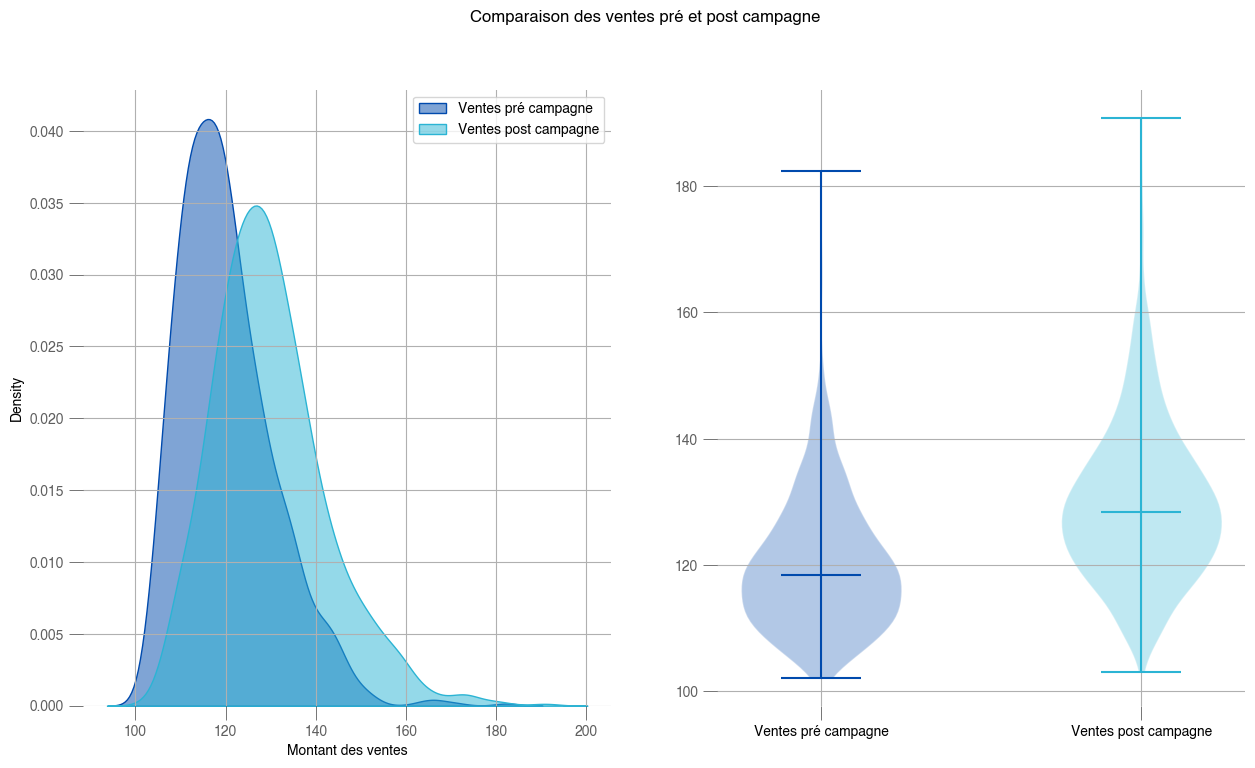

In [13]:
# visualisation des données
plt.clf()
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

sns.kdeplot(pre_campagne_data, fill=True, color=COLORS[0], label="Ventes pré campagne", ax=axes[0], alpha=.5)
sns.kdeplot(post_campagne_data, fill=True, color=COLORS[1], label="Ventes post campagne", ax=axes[0], alpha=.5)
axes[0].set_xlabel("Montant des ventes")
axes[0].legend()
axes[0].grid(True)

violins = axes[1].violinplot(
[pre_campagne_data, post_campagne_data], vert=True, showmeans=False, showmedians=True  # vertical box alignment
)
axes[1].set_xticks(
        [y + 1 for y in range(2)],
        labels=[
            "Ventes pré campagne",
            rf"Ventes post campagne"
        ],
        color="black",
        fontweight="bold",
    )

for i, pc in enumerate(violins["bodies"]):
    pc.set_facecolor(COLORS[i])
    pc.set_edgecolor("white")
    violins["cbars"].set_color(COLORS)
    violins["cmedians"].set_color(COLORS)
    violins["cmaxes"].set_color(COLORS)
    violins["cmins"].set_color(COLORS)
    axes[1].grid(True)

plt.suptitle("Comparaison des ventes pré et post campagne", fontweight="bold")
plt.show()

In [14]:
test_statistic, p_value = ttest_ind(x, y, equal_var=True, alternative="two-sided")

print(f"Test statistic: {test_statistic} | P-value: {p_value}")


t_test = Ttest()
print(f"H0: {t_test.null_hypothesis}")

t_test.fit(X=x, y=y, )
print(f"Is H0 true: {t_test.is_null_hypothesis_true}")

print(f"Test parameters: {t_test.test_parameters.__dict__}")

Test statistic: 0.15216791582984776 | P-value: 0.8792094413331935
H0: Means of the samples are the same
Is H0 true: True
Test parameters: {'p_value': 0.8792094413331935, 'statistic': 0.15216791582984776}
